In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import anndata as ad
import squidpy as sq
import scanpy as sc

In [3]:
filename = '/Users/mmd47/Google Drive/My Drive/DiStasio Lab Share/03 Data/Retina_SlideSeq_Curio/A22_3781_AMD_SlideSeq_001/A0052_029_anndata_annotated.h5ad'

adata = ad.read_h5ad(filename)


In [4]:
retina1 = adata[adata.obs['Retina_1']]
retina2 = adata[adata.obs['Retina_2']]

In [5]:
# QC
retina1.var["mt"] = retina1.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(retina1, qc_vars=["mt"], inplace=True)

## Normalize
print('Normalizing...')
sc.pp.normalize_total(retina1, target_sum=1e4)
sc.pp.log1p(retina1)

## Filtering
print('Filtering...')
#sc.pp.filter_cells(retina1, min_genes=200)
sc.pp.filter_genes(retina1, min_cells=3)

# QC
retina2.var["mt"] = retina2.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(retina2, qc_vars=["mt"], inplace=True)

## Normalize
print('Normalizing...')
sc.pp.normalize_total(retina2, target_sum=1e4)
sc.pp.log1p(retina2)

## Filtering
print('Filtering...')
#sc.pp.filter_cells(retina1, min_genes=200)
sc.pp.filter_genes(retina2, min_cells=3)

Normalizing...
Filtering...
Normalizing...
Filtering...


In [6]:


## Clustering
print('Clustering...')
sc.tl.pca(retina1, svd_solver='arpack', n_comps=30)
sc.pp.neighbors(retina1, n_neighbors=20, n_pcs=30)
sc.tl.leiden(retina1)
sc.tl.paga(retina1)
sc.pl.paga(retina1, plot=False)
sc.tl.umap(retina1, init_pos='paga')

print('Done!')



## Clustering
print('Clustering...')
sc.tl.pca(retina2, svd_solver='arpack', n_comps=30)
sc.pp.neighbors(retina2, n_neighbors=20, n_pcs=30)
sc.tl.leiden(retina2)
sc.tl.paga(retina2)
sc.pl.paga(retina2, plot=False)
sc.tl.umap(retina2, init_pos='paga')

print('Done!')


Clustering...
Done!
Clustering...
Done!


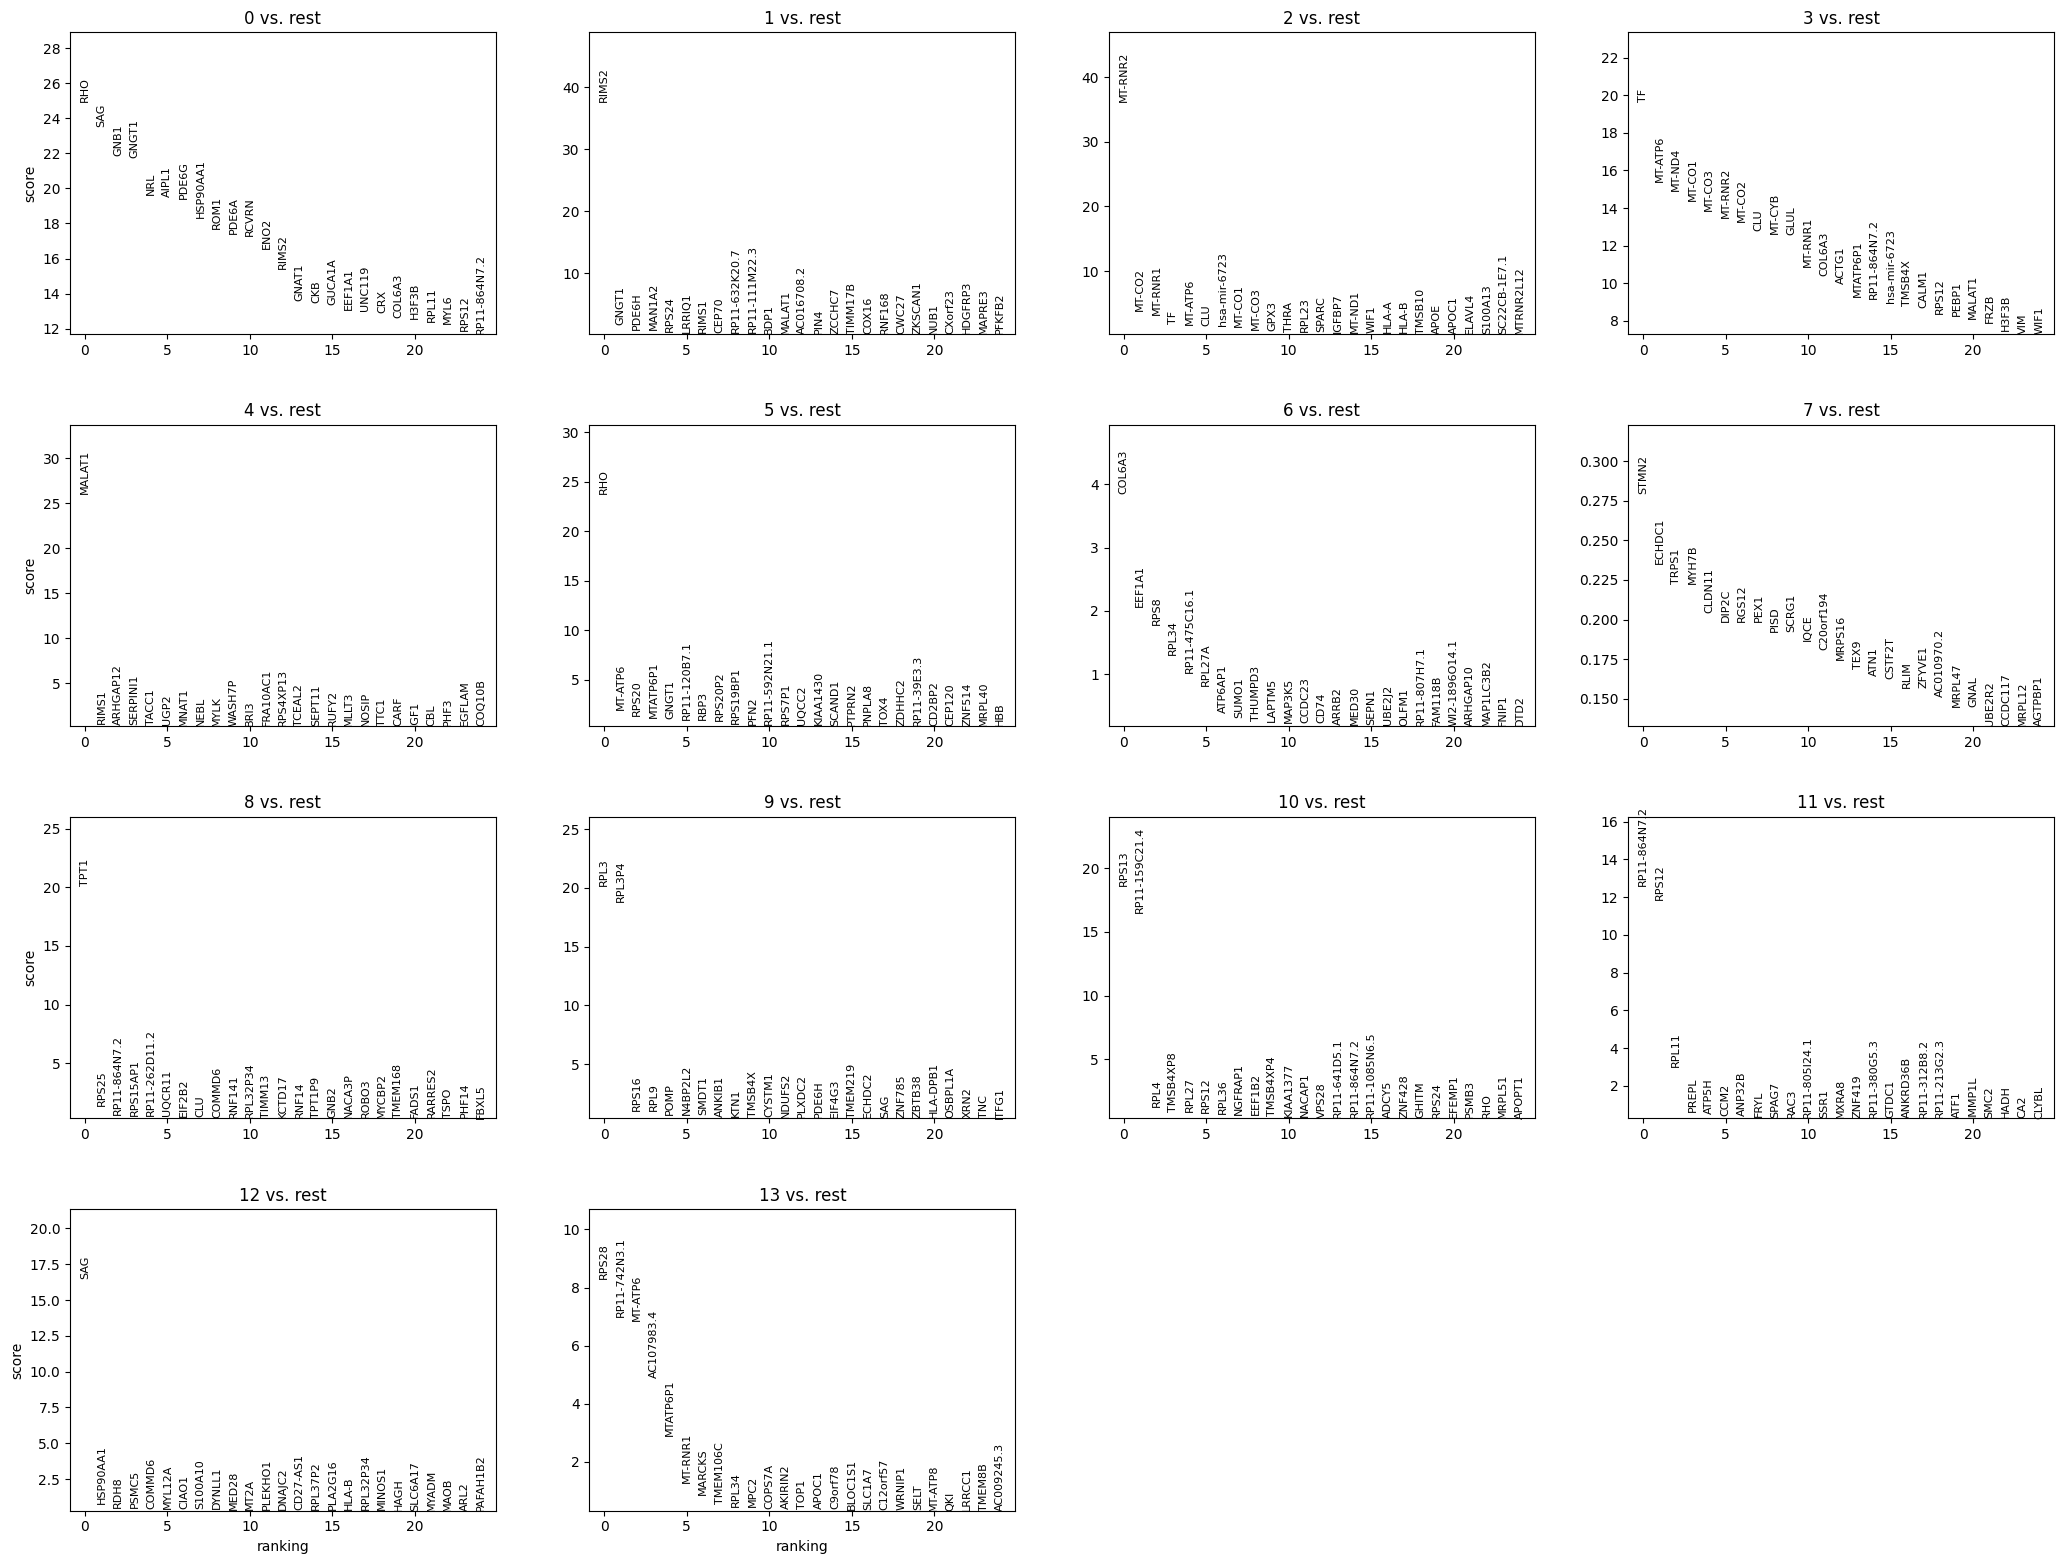

In [7]:
sc.tl.rank_genes_groups(retina1, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(retina1, n_genes=25, sharey=False)

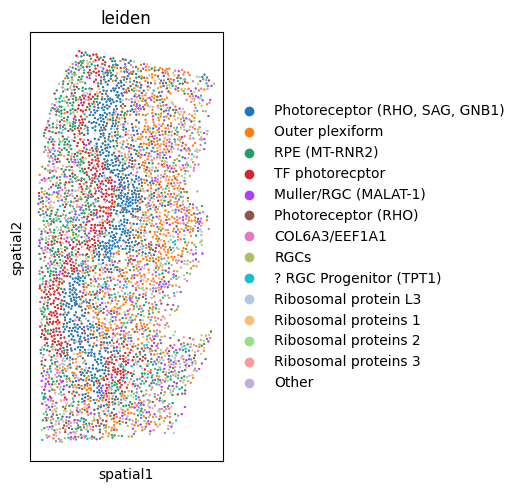

In [12]:

new_cluster_names = [
    'Photoreceptor (RHO, SAG, GNB1)', 
    'Photoreceptor (Cones); RIMS2',
    'Muller Glia', 
    'TF photorecptor',
    'Muller/RGC (MALAT-1)',
    'Photoreceptor (RHO)',
    'COL6A3/EEF1A1',
    'RGCs',
    '? RGC Progenitor (TPT1)',
    'Ribosomal protein L3',
    'Ribosomal proteins 1',
    'Ribosomal proteins 2',
    'Ribosomal proteins 3',
    'Other']
retina1.rename_categories('leiden', new_cluster_names)

sq.pl.spatial_scatter(retina1, color="leiden", size=1, shape=None)

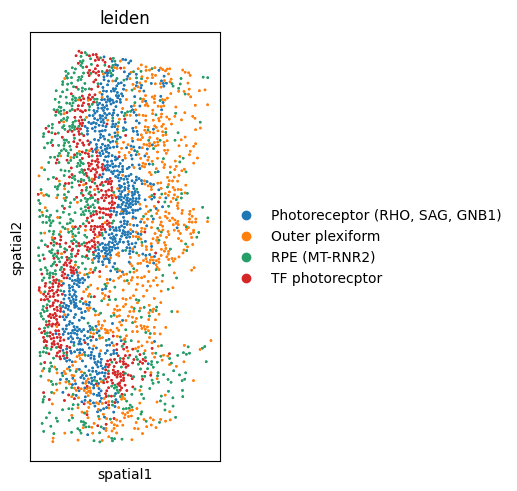

In [19]:
sq.pl.spatial_scatter(
    retina1,
    shape=None,
    color='leiden',
    groups=['RPE (MT-RNR2)','Photoreceptor (RHO, SAG, GNB1)',  'TF photorecptor', 'Outer plexiform'],
    size=3,
)


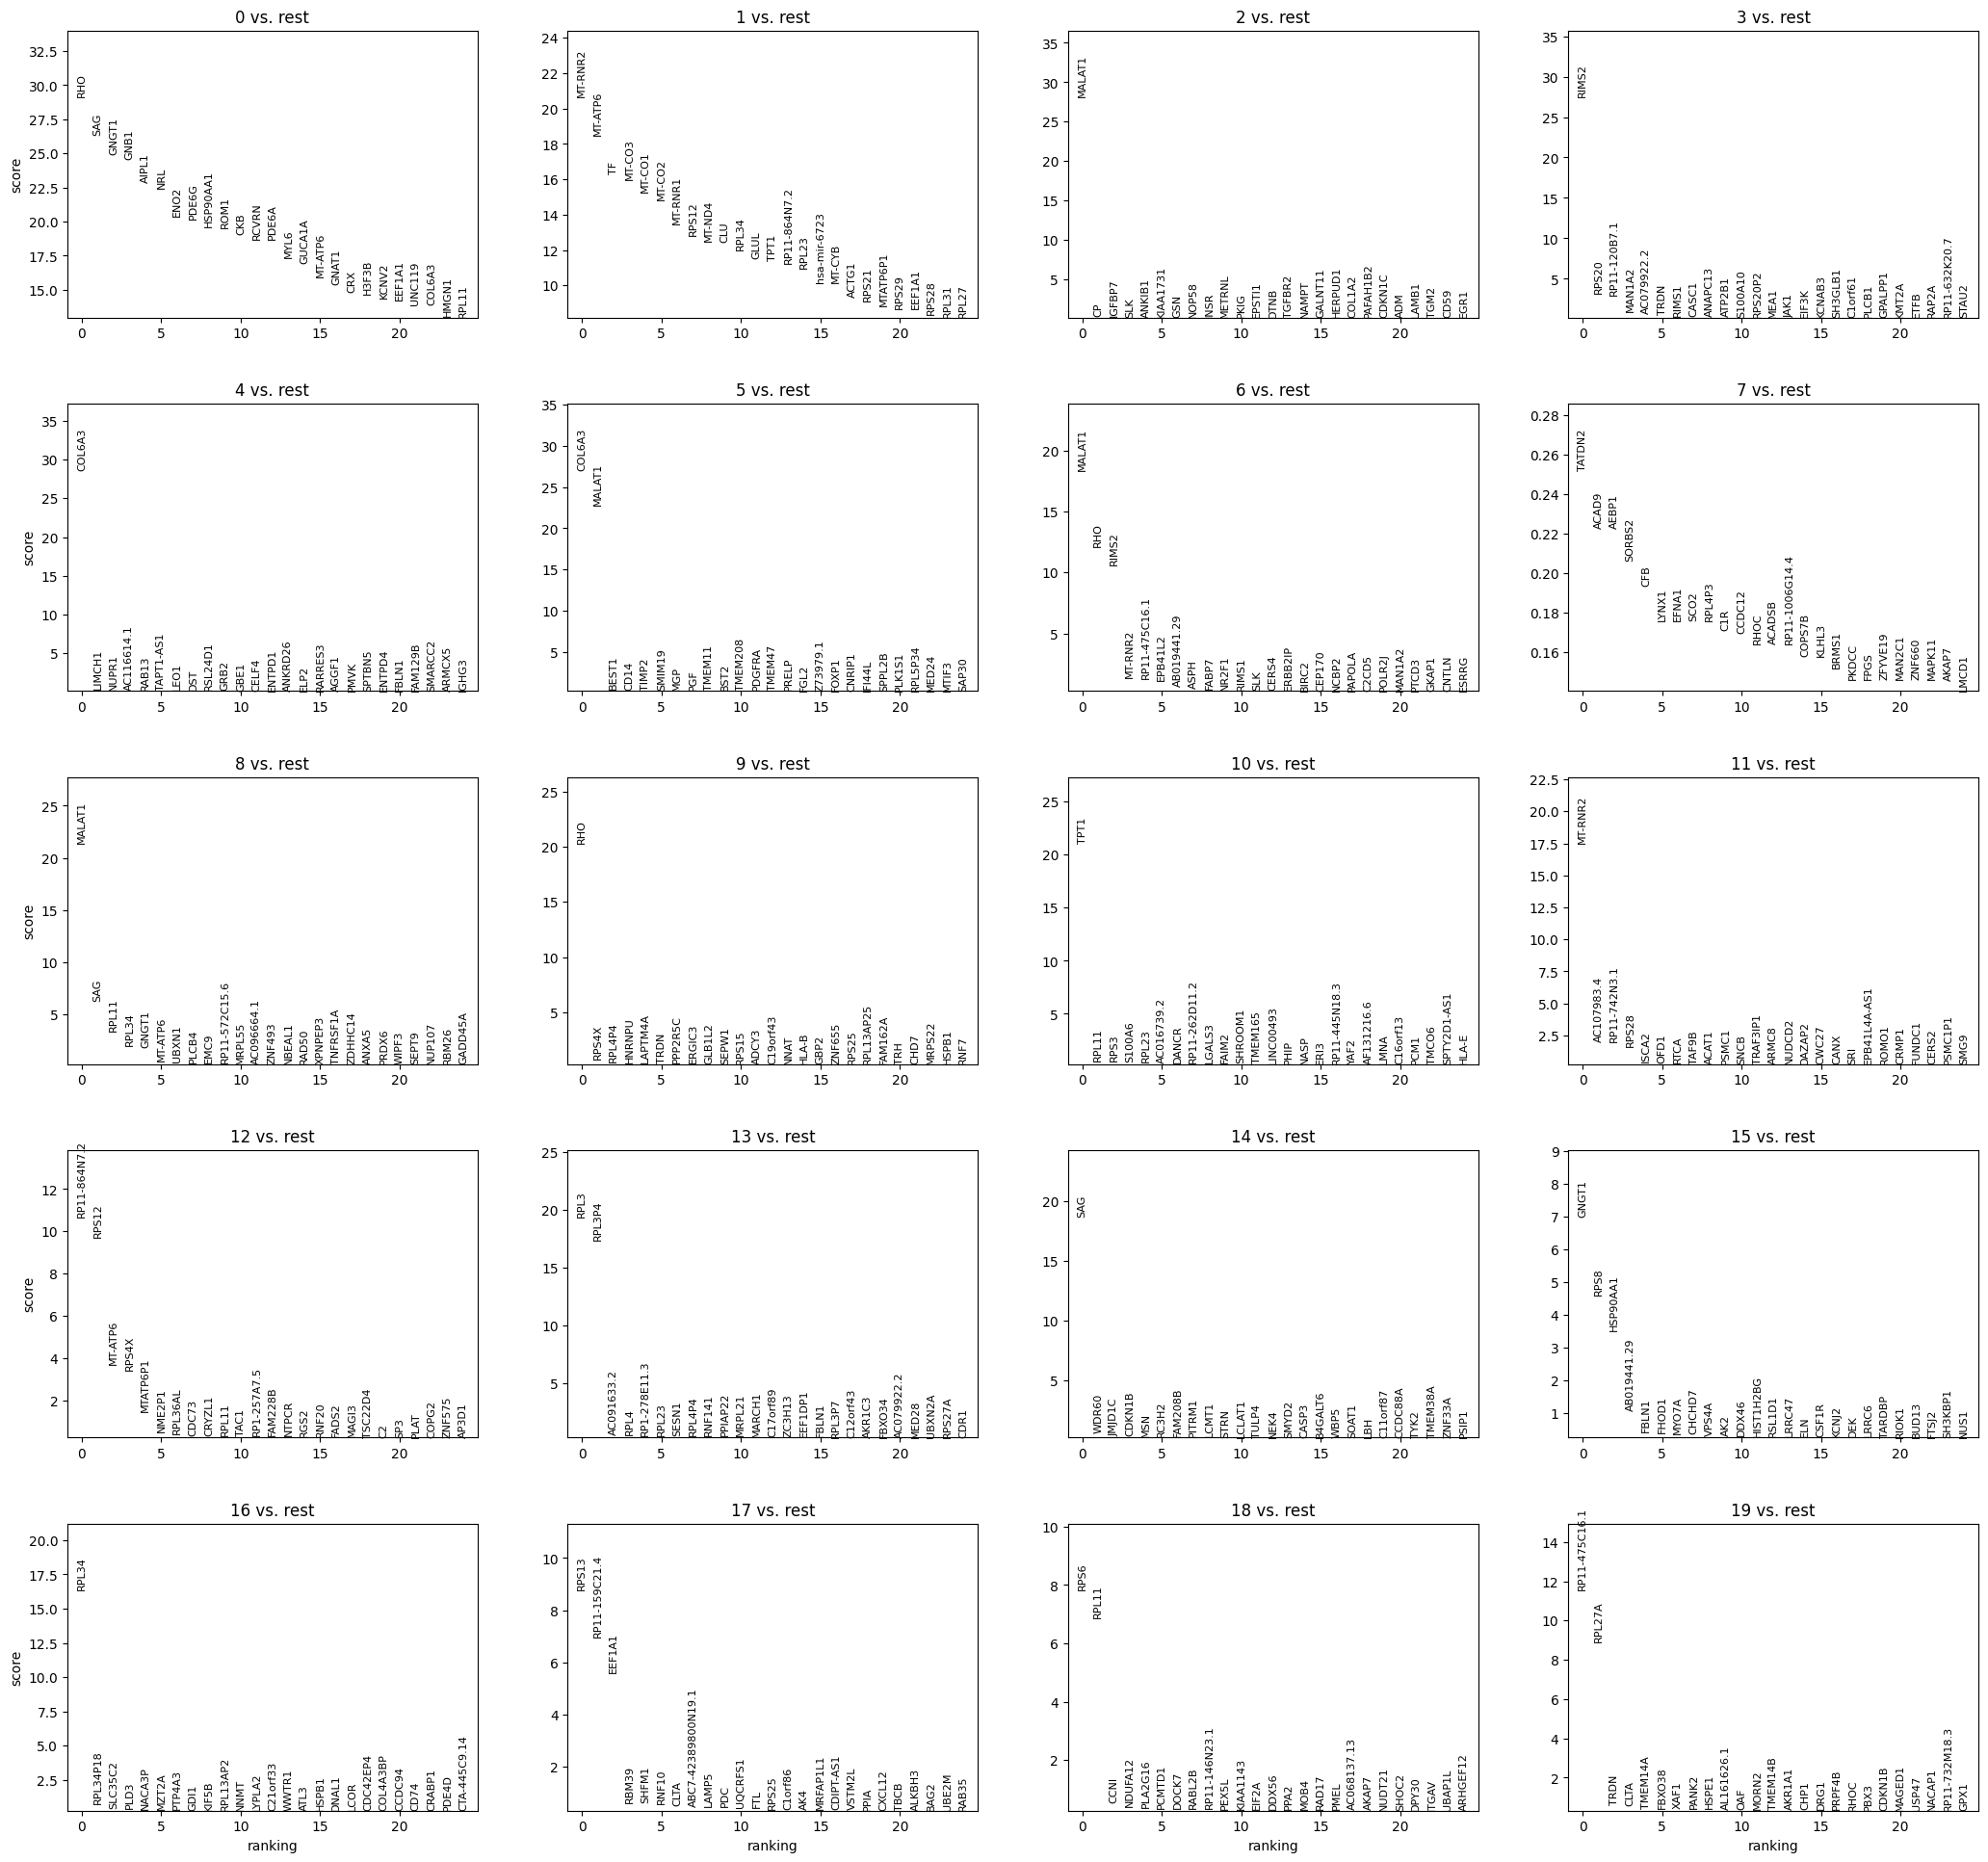

In [8]:
sc.tl.rank_genes_groups(retina2, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(retina2, n_genes=25, sharey=False)

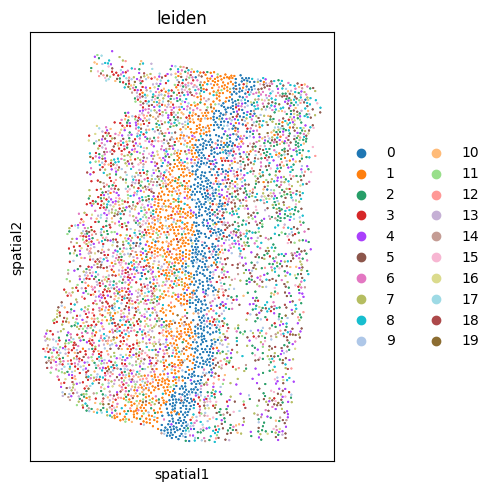

In [11]:
sq.pl.spatial_scatter(retina2, color="leiden", size=1, shape=None)